In [2]:
import os
import typing

import numpy as np
import pandas as pd
from scipy.stats import rankdata
from itertools import product,combinations,chain
from models import bt_plot,model,glrt,model_builder
from dataset_management import get_dataset
from pymer4.models import Lmer
import matplotlib.pyplot as plt


pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 10000)
dataset=get_dataset(dataset_name="fig5_24_at25_bad_intsteps")
algoritihm="algorithm";benchmark="bench_prior";budget="budget"
algos=["A-1","A-2","A-3"]
seeds=[str(x) for x in range(50)]
benchmarks=["B-0","B-1","B-2"]
budgets=range(1,11)
combination = list(product(algos, benchmarks, [0],seeds,budgets))

random_df = pd.DataFrame(combination, columns=["algorithm", "benchmark", "value", "seed",budget])
random_df["value"] = random_df.apply(lambda x: np.random.normal(0, 0.1),axis=1)

seed_df = pd.DataFrame(combination, columns=["algorithm", "benchmark", "value", "seed",budget])
seed_df["value"] = seed_df.apply(lambda row:np.random.normal(int(row["seed"])*0.1 if row["algorithm"][2] in ["1"] and (int(row["seed"])%5==0 and row["seed"]!="0") else 2.5, 0.1 if row["algorithm"][2] in ["1"] else 0.55), axis=1)

benchmark_df = pd.DataFrame(combination, columns=["algorithm", "benchmark", "value", "seed",budget])
benchmark_df["value"] = benchmark_df.apply(lambda row: np.random.normal(0.1*int(row["algorithm"][2])*int(row["benchmark"][2]), 0.01), axis=1)


budget_df=pd.DataFrame(combination, columns=["algorithm", "benchmark", "value", "seed",budget])
budget_df["value"] = budget_df.apply(lambda row:np.random.normal(0.1*np.random.normal(int(row[budget])-5,6,1)[0], 0.2), axis=1)

✅ Loading data done                                                                                 


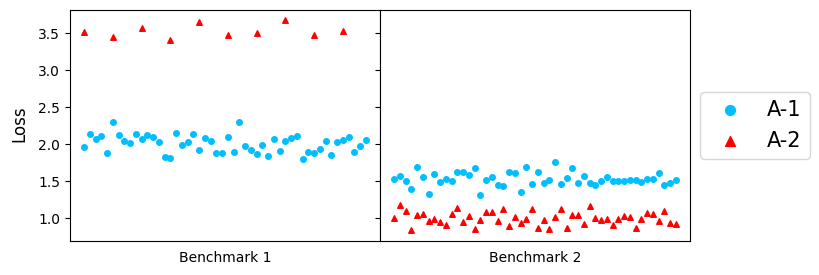

In [45]:
benchs=["B-1","B-2"]
algos=["A-1","A-2"]
seed=[str(x) for x in range(50)]
combination = list(product(algos, benchmarks,seeds))
synth_data=pd.DataFrame(combination, columns=["algorithm", "benchmark", "seed"])
synth_data["value"] = synth_data.apply(lambda row:np.random.normal(1.5*int(row["algorithm"][2])+0.5 if int(row["benchmark"][2])==1 else 1-0.5*int(row["algorithm"][2])+1, 0.1), axis=1)
synth_data=synth_data.loc[(synth_data["benchmark"]!="B-1") | (synth_data["algorithm"]!="A-2") | (synth_data["seed"].astype(int)%5==0) ]

color={"A-1":"deepskyblue","A-2":"red","A-3":"limegreen"}
marker={"A-2":"^","A-1":"o","A-3":"s"}
fig=plt.figure(figsize=(8,3))
# fig.supxlabel('Seed',y=-0.1)
fig.supylabel('Loss',x=0.05)
gs = fig.add_gridspec(1,2, wspace=0)
axs = gs.subplots(sharey=True)
for b_n,benchmark in enumerate(["B-1","B-2"]):
    bench_df=synth_data.loc[synth_data["benchmark"]==benchmark]
    for algo in ["A-1","A-2"]:
        axs[b_n].scatter(x=bench_df.loc[bench_df["algorithm"]==algo]["seed"].astype(int),y=bench_df.loc[bench_df["algorithm"]==algo]["value"],label=algo,color=color[algo],s=16,alpha=1,marker=marker[algo])
    plt.sca(axs[b_n])
    plt.xlabel(f"Benchmark {benchmark[2]}")
    plt.xticks([])

legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
        fancybox=True, shadow=False, ncol=1, prop={'size': 15})
for i in range(2):
    legend.legendHandles[i]._sizes = [50]

fig.savefig(dpi=300,pad_inches=0.1, bbox_inches="tight",fname="img/synth_2bench.png")
plt.show()

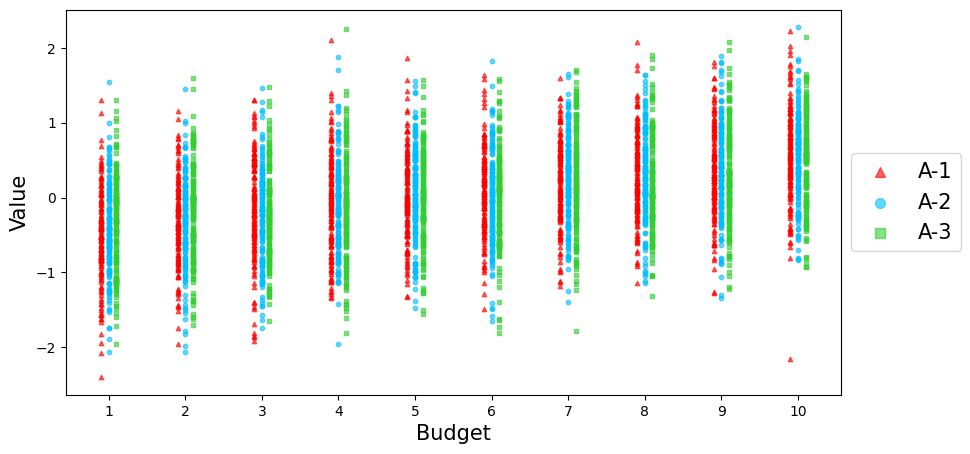

In [29]:
color={"A-1":"red","A-2":"deepskyblue","A-3":"limegreen"}
marker={"A-1":"^","A-2":"o","A-3":"s"}
fig=plt.figure(figsize=(10,5))
for a_n,algo in enumerate(["A-1","A-2","A-3"]):
    plt.scatter(x=budget_df.loc[budget_df["algorithm"]==algo]["budget"].astype(int)+(a_n-1)*0.1,y=budget_df.loc[budget_df["algorithm"]==algo]["value"],label=algo,color=color[algo],s=10,alpha=0.6,marker=marker[algo])
plt.xlabel("Budget",fontsize=15)
plt.xticks(range(1,11))
plt.ylabel("Value",fontsize=15)
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           fancybox=True, shadow=False, ncol=1, prop={'size': 15})
for i in range(3):
    legend.legendHandles[i]._sizes = [50]
fig.savefig(dpi=300,pad_inches=0.1, bbox_inches="tight",fname="img/budget_df")
plt.show()

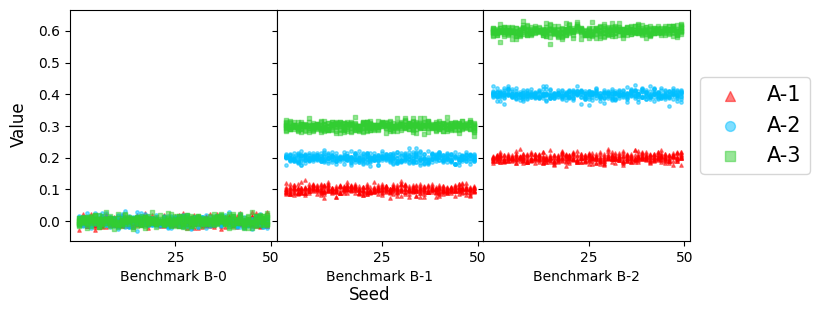

In [28]:

color={"A-1":"red","A-2":"deepskyblue","A-3":"limegreen"}
marker={"A-1":"^","A-2":"o","A-3":"s"}
fig=plt.figure(figsize=(8,3))
fig.supxlabel('Seed',y=-0.1)
fig.supylabel('Value',x=0.05)
gs = fig.add_gridspec(1,3, wspace=0)
axs = gs.subplots(sharey=True)
for b_n,benchmark in enumerate(["B-0","B-1","B-2"]):
    bench_df=benchmark_df.loc[benchmark_df["benchmark"]==benchmark]
    for algo in ["A-1","A-2","A-3"]:
        axs[b_n].scatter(x=bench_df.loc[bench_df["algorithm"]==algo]["seed"].astype(int),y=bench_df.loc[bench_df["algorithm"]==algo]["value"],label=algo,color=color[algo],s=6,alpha=0.5,marker=marker[algo])
    plt.sca(axs[b_n])
    plt.xlabel(f"Benchmark {benchmark}")
    plt.xticks([25,50])

legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
        fancybox=True, shadow=False, ncol=1, prop={'size': 15})
for i in range(3):
    legend.legendHandles[i]._sizes = [50]

fig.savefig(dpi=300,pad_inches=0.1, bbox_inches="tight",fname="img/benchmark_df")
plt.show()


Benchmark: B-0
Simple model (945.89) == Model with Algorithm-effect (946.6)
Chi-Square: 1.4238314897902455, P-Value: 0.4907032342100187
=> Benchmark B-0 is uninformative.

Benchmark: B-1
Simple model (323.4) << Model with Algorithm-effect (943.88)
Chi-Square: 1240.955971008893, P-Value: 0.0
=> Benchmark B-1 is informative.

Benchmark: B-2
Simple model (116.56) << Model with Algorithm-effect (969.12)
Chi-Square: 1705.1217418805325, P-Value: 0.0
=> Benchmark B-2 is informative.



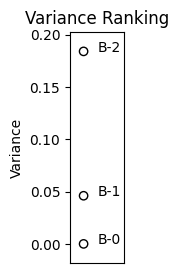

Benchmarks without algorithm variation: ['B-0']


['B-0']

In [3]:
builder=model_builder(benchmark_df)
builder.test_benchmark_information(rank_benchmarks=True)

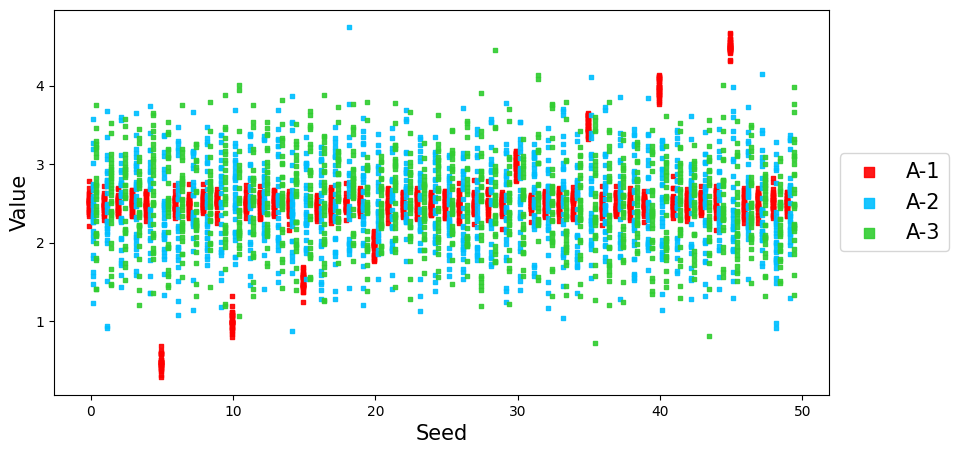

In [27]:
color={"A-1":"red","A-2":"deepskyblue","A-3":"limegreen"}
marker={"A-1":"s","A-2":"s","A-3":"s"}
fig=plt.figure(figsize=(10,5))
for a_n,algo in enumerate(["A-1","A-2","A-3"]):
    plt.scatter(x=seed_df.loc[seed_df["algorithm"]==algo]["seed"].astype(int)+0.25*a_n-0.1,y=seed_df.loc[seed_df["algorithm"]==algo]["value"],label=algo,color=color[algo],s=10,alpha=0.9,marker=marker[algo])
    # print(np.mean(seed_df.loc[seed_df["algorithm"]==algo]["value"]))
    # print(np.std(seed_df.loc[seed_df["algorithm"]==algo]["value"]))
plt.xlabel("Seed",fontsize=15)
plt.ylabel("Value",fontsize=15)
legend=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           fancybox=True, shadow=False, ncol=1, prop={'size': 15})
for i in range(3):
    legend.legendHandles[i]._sizes = [50]
fig.savefig(dpi=300,pad_inches=0.1, bbox_inches="tight",fname="img/seed_df")
plt.show()

In [5]:
builder=model_builder(seed_df)
builder.test_seed_dependency()

Simple model (-708.25) << Model with Seed-effect (-582.03)
Chi-Square: 252.43630283010953, P-Value: 0.0
Seed is a significant effect, likely influenced algorithms: ['A-1']


['A-1']

In [45]:
builder=model_builder(budget_df)
builder.test_fidelity(fidelity_var="budget")

Simple model (-4730.37) << Model with Fidelity-effect (-4316.33)
Chi-Square: 828.0843694916384, P-Value: 0.0

Simple model (-4730.37) << Model with Fidelity-interaction-effect (-4316.33)
Chi-Square: 828.0917922314129, P-Value: 0.0

Model with Fidelity-effect (-4316.33) == Model with Fidelity-interaction-effect (-4316.33)
Chi-Square: 0.007422739774483489, P-Value: 0.9962955087336448

Fidelity budget is both as simple and interaction effect significant, but as simple effect performs better.
